In [24]:
import numpy as np
from networkx.algorithms.community import LFR_benchmark_graph

In [61]:
n = 1000
tau1 = 2
tau2 = 1.05
mu = 0.1
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5,min_community=50, seed=11, max_iters=100)

In [62]:
communities = {frozenset(G.nodes[v]['community']) for v in G}
print(communities)

{frozenset({643, 772, 900, 7, 903, 10, 11, 524, 782, 278, 24, 282, 539, 542, 31, 32, 30, 807, 39, 554, 171, 940, 47, 49, 564, 822, 56, 952, 316, 76, 77, 80, 507, 854, 470, 215, 727, 730, 859, 220, 738, 355, 226, 228, 741, 359, 617, 491, 877, 366, 749, 240, 241, 760, 763, 503, 504, 761, 635, 252, 253, 511}), frozenset({4, 522, 18, 532, 21, 536, 25, 538, 287, 806, 41, 557, 48, 563, 317, 321, 322, 73, 79, 596, 88, 606, 96, 97, 614, 105, 116, 632, 889, 634, 124, 126, 638, 642, 645, 134, 902, 911, 409, 922, 411, 413, 672, 931, 421, 939, 941, 430, 943, 179, 438, 440, 185, 955, 443, 196, 965, 968, 459, 717, 719, 975, 981, 472, 475, 476, 990, 485, 744, 489, 236, 509, 767}), frozenset({512, 1, 2, 0, 774, 6, 521, 13, 273, 274, 785, 281, 286, 802, 37, 167, 45, 301, 560, 311, 568, 58, 571, 61, 573, 447, 832, 576, 703, 324, 837, 582, 198, 329, 972, 78, 593, 721, 978, 85, 94, 222, 479, 994, 996, 869, 486, 230, 742, 747, 237, 111, 367, 883, 246, 380, 249, 636}), frozenset({896, 641, 897, 644, 132, 51

In [63]:
len(communities)

11

In [64]:
import networkx as nx

In [65]:
g_array = nx.to_numpy_array(G)

In [70]:
np.set_printoptions(threshold=100)

In [74]:
g_array

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
np.random.rand()

0.29215139442788707

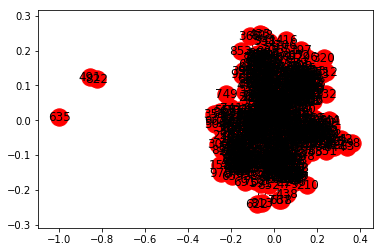

In [68]:
nx.draw_networkx(G)

In [72]:
G = np.zeros((500, 500))

In [83]:
for i in range(500):
    for j in range(i, 500):
        if j <= i+10:
            if np.random.rand() < 3/10:
                G[i][j] = np.random.randn()
                G[j][i] = np.random.randn()
        else:
            if np.random.rand() < 3/490:
                G[i][j] = np.random.randn()
                G[j][i] = np.random.randn()

In [84]:
G=nx.from_numpy_matrix(G)

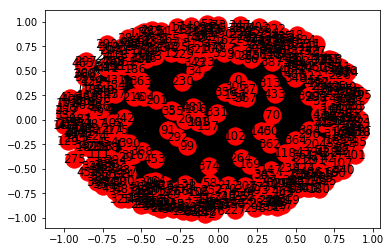

In [85]:
nx.draw_networkx(G)

In [109]:
def make_modular_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    G = np.zeros((N, N))
    for i in range(N):
        for j in range(i, N):
            if j <= i+(N/community_number):
                if np.random.rand() < average_degree*(1-mu)/(N/community_number):
                    G[i][j] = np.random.randn()
                    G[j][i] = np.random.randn()
            else:
                if np.random.rand() < average_degree*(mu)/(N-(N/community_number)):
                    G[i][j] = np.random.randn()
                    G[j][i] = np.random.randn()
    return G

In [113]:
G_array = make_modular_network(50, 5, 25, 0.1)

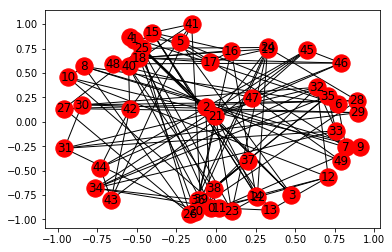

In [114]:
G=nx.from_numpy_matrix(G_array)
nx.draw_networkx(G)

In [363]:
def make_modular_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    G = np.zeros((N, N))
    for i in range(N):
        for j in range(i, N):
            if j < (N/community_number)*(i//(N/community_number)+1):
                if np.random.rand() < ((N-(i/N))/N)*average_degree*(1-mu)/(N/community_number):
                    G[i][j] = 1
                    G[j][i] = 1
            else:
                if np.random.rand() < ((N-(i/N))/N)*average_degree*(mu)/(N-(N/community_number)):
                    G[i][j] = 1
                    G[j][i] = 1
    return G

In [346]:
G_array = make_modular_network(200, 3, 4, 0.1)
G=nx.from_numpy_matrix(G_array)

In [354]:
G.degree()

DegreeView({0: 3, 1: 0, 2: 1, 3: 1, 4: 4, 5: 4, 6: 2, 7: 6, 8: 1, 9: 6, 10: 7, 11: 3, 12: 4, 13: 5, 14: 4, 15: 5, 16: 1, 17: 4, 18: 3, 19: 1, 20: 2, 21: 2, 22: 4, 23: 4, 24: 3, 25: 3, 26: 6, 27: 3, 28: 1, 29: 2, 30: 0, 31: 3, 32: 0, 33: 4, 34: 3, 35: 2, 36: 6, 37: 5, 38: 4, 39: 5, 40: 2, 41: 4, 42: 7, 43: 4, 44: 1, 45: 1, 46: 2, 47: 1, 48: 2, 49: 4, 50: 1, 51: 3, 52: 2, 53: 2, 54: 3, 55: 2, 56: 1, 57: 0, 58: 2, 59: 4, 60: 2, 61: 2, 62: 4, 63: 2, 64: 3, 65: 3, 66: 5, 67: 3, 68: 1, 69: 2, 70: 2, 71: 4, 72: 3, 73: 2, 74: 6, 75: 2, 76: 5, 77: 4, 78: 5, 79: 1, 80: 2, 81: 3, 82: 2, 83: 1, 84: 2, 85: 1, 86: 3, 87: 1, 88: 2, 89: 2, 90: 4, 91: 3, 92: 2, 93: 2, 94: 2, 95: 2, 96: 1, 97: 3, 98: 1, 99: 3, 100: 3, 101: 4, 102: 4, 103: 4, 104: 0, 105: 4, 106: 2, 107: 2, 108: 5, 109: 3, 110: 2, 111: 2, 112: 3, 113: 5, 114: 4, 115: 3, 116: 4, 117: 3, 118: 4, 119: 1, 120: 7, 121: 3, 122: 4, 123: 5, 124: 2, 125: 6, 126: 2, 127: 7, 128: 4, 129: 4, 130: 5, 131: 3, 132: 1, 133: 6, 134: 3, 135: 3, 136: 4, 13

In [348]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

In [349]:
print(degree_sequence)

[7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [350]:
np.mean(degree_sequence)

2.92

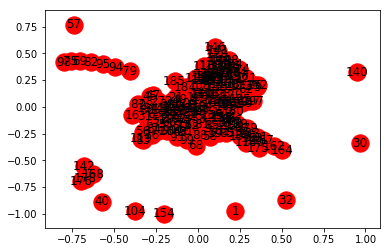

In [351]:
nx.draw_networkx(G)

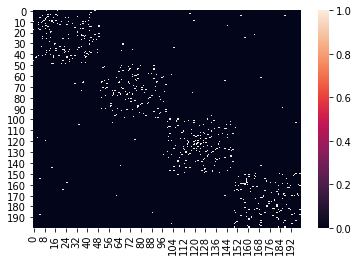

In [352]:
import seaborn as sns
sns.heatmap(G_array)

In [389]:
G_array = make_modular_network(128, 16, 4, 0.1)
G=nx.from_numpy_matrix(G_array)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
print(degree_sequence)
print(np.mean(degree_sequence))

[25, 23, 23, 23, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10]
16.515625


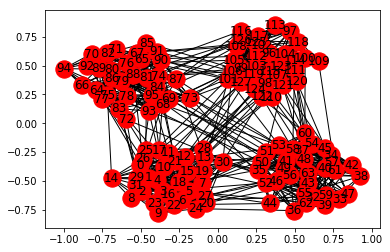

In [390]:
nx.draw_networkx(G)

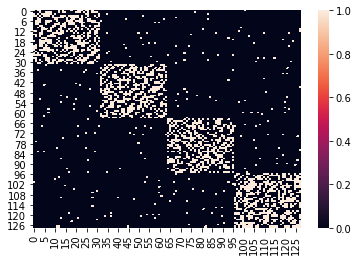

In [391]:
sns.heatmap(G_array)